In [1]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler  #标准化或归一化数值数据
from sklearn.pipeline import make_pipeline

In [2]:
import numpy as np
import pandas as pd

# 假设 X_train 是包含一些示例数据的 DataFrame
data = {
    'AA': ['cat', 'dog', np.nan],
    'BB': ['apple', 'banana', 'apple'],
    'CC': ['red', np.nan, 'blue']
}
X_train = pd.DataFrame(data)
X_train

,AA,BB,CC
0,cat,apple,red
1,dog,banana,NaN
2,NaN,apple,blue


In [3]:
imputer = SimpleImputer(strategy='constant', fill_value='missing')
filled_data = imputer.fit_transform(X_train)
print(filled_data)

[['cat' 'apple' 'red']
 ['dog' 'banana' 'missing']
 ['missing' 'apple' 'blue']]


In [4]:
# 创建管道
ohe = make_pipeline(SimpleImputer(strategy='constant', fill_value='missing'), OneHotEncoder())  #fill_value这个关键词默认是missing，所以不写也行

# 应用管道到特定列
X_encoded = ohe.fit_transform(X_train[['AA', 'BB', 'CC']])

In [5]:
y = X_encoded.toarray()
# 将结果转换为数组并打印
print(y)

[[1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0. 1. 0. 0.]]


In [6]:
x = pd.DataFrame(y)
x

,0,1,2,3,4,5,6,7
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


为啥是8列，因为BB这一个分类条目只有两种类别。其他条目里的missing实际上也都算一种类别了。所以有了9-1=8个分类

以下为微信好友给我的实例：

In [7]:
from sklearn.datasets import fetch_openml

house = fetch_openml(name = 'house_prices', as_frame = True)
#house.data.iloc[:,13]
house.data
#print(house.data['Exterior1st'].tolist())
#house.target
#house.feature_names


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,RL,62.0,7917.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,8.0,2007.0,WD,Normal
1456,1457.0,20.0,RL,85.0,13175.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,MnPrv,None,0.0,2.0,2010.0,WD,Normal
1457,1458.0,70.0,RL,66.0,9042.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,GdPrv,Shed,2500.0,5.0,2010.0,WD,Normal
1458,1459.0,20.0,RL,68.0,9717.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,4.0,2010.0,WD,Normal


这个数据可以调用哪些参数？看下面
openml_data_attributes = [
    "data: 包含特征向量的NumPy数组（如果 as_frame=False）或包含特征和目标列的Pandas DataFrame（如果 as_frame=True）。",
    "target: 包含目标（或标签）数据的列，用于监督学习中的预测目标。",
    "feature_names: 数据集中所有特征的名称列表，有助于识别各列数据的意义。",
    "target_names: 目标变量的名称，特别在分类任务中，有助于了解目标变量的具体含义。",
    "DESCR: 描述数据集的文本，通常包含数据集的来源、结构、特征说明等。",
    "details: 包含数据集详细信息的字典，如 OpenML ID、版本、上传者信息等。",
    "categories: 对于分类特征，提供每个类别特征的可能值的映射。",
    "url: 数据集在 OpenML 上的具体URL，可以通过此链接直接访问数据集的网页视图。"
]

In [8]:
#寻找所有的类别列，以区分哪些是文本数据，哪些是数值数据。以便于进行独热编码。
cat_columns = house.data.select_dtypes(include=['object', 'category']).columns.tolist()   # 文本型数据
num_columns = house.data.select_dtypes(exclude=['object', 'category']).columns.tolist()   #数值型数据

print("Categorical columns:", cat_columns)
print("Numberic columns:", num_columns)

Categorical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Numberic columns: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'Gara

In [9]:
#下面对数据进行归类和处理

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline #用于创建一个处理流程，它串联多个转换步骤和一个估计器（如模型）

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(house.data, house.target, test_size = 0.2, random_state = 2) 

#col_cat = ['AA','BB','CC']   # 文本型数据
#col_num = ['DD','EE','FF']  #数值型数据

X_train_cat = X_train[cat_columns]
X_train_num = X_train[num_columns]
X_test_cat = X_test[cat_columns]
X_test_num = X_test[num_columns]

#X_test_cat
#print(X_test_cat.columns)

#for column in X_test_cat.columns:
#    if X_test_cat[column].astype(str).str.contains('Metal').any():
#        print(f"Column '{column}' contains the word 'Metal'.")

In [14]:
from sklearn.preprocessing import StandardScaler

scaler_cat = make_pipeline(SimpleImputer(strategy='constant'), OneHotEncoder(handle_unknown='ignore')) 
#OneHotEncoder(handle_unknown='ignore')这一步是为了处理测试集中有与训练集中不存在的类别时，独热编码器报错。
#更好的处理方式可能是这样：在开始模型训练之前，检查数据集中的所有可能类别，并确保训练集和测试集中的类别一致。这可能涉及到数据清洗或预处理步骤，比如将稀有类别合并为一个共同类别。

X_train_cat_enc = scaler_cat.fit_transform(X_train_cat)
X_test_cat_enc = scaler_cat.transform(X_test_cat)

scaler_num = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
X_train_num_scaled = scaler_num.fit_transform(X_train_num)
X_test_num_scaled = scaler_num.transform(X_test_num)

#输出转换后的稀疏矩阵
#print(X_train_cat_enc)
#print(X_train_num_scaled)

#当您尝试打印 X_train_cat_enc 时，如果它是稀疏矩阵格式，将不会直接显示所有数据。相反，
#它通常会显示矩阵的非零位置和值的压缩表示，或者简单地显示矩阵的存储格式和尺寸信息。

#打印 X_train_num_scaled 时，通常会显示一个完整的密集数组，其中每个元素都有具体
#的值（填充和转换后的数值），这与独热编码生成的稀疏格式截然不同。

In [15]:
#下面对处理后的文本数据与数字数据合并

import numpy as np
from scipy import sparse

X_train = sparse.hstack((X_train_cat_enc,
                                sparse.csr_matrix(X_train_num_scaled))) # 文本数据和数字数据进行合并
X_test = sparse.hstack((X_test_cat_enc,
                               sparse.csr_matrix(X_test_num_scaled)))   # 文本数据和数字数据进行合并

In [21]:
X_train

<1168x303 sparse matrix of type '<class 'numpy.float64'>'
	with 93168 stored elements in COOrdinate format>

In [20]:
X_test

<292x303 sparse matrix of type '<class 'numpy.float64'>'
	with 23282 stored elements in COOrdinate format>

In [23]:
# 再次合并为完整的X
X = sparse.vstack((X_train, X_test))
X

<1460x303 sparse matrix of type '<class 'numpy.float64'>'
	with 116450 stored elements in COOrdinate format>

RMSE(training)18487.085
RMSE(test)37616.541


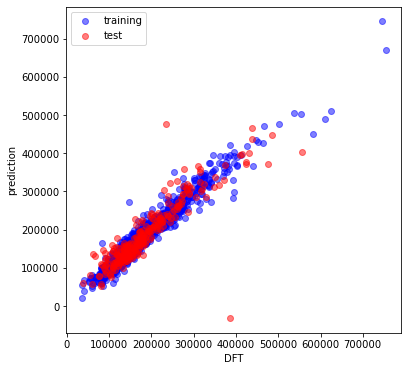

In [19]:
#8. 进行线性回归

from sklearn.linear_model import LinearRegression  #线性回归拟合

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)

#9. 作图
import matplotlib.pyplot as plt

plt.figure(figsize = (6, 6))
plt.scatter(y_train, y_pred_train_lr, alpha = 0.5, color = 'b', label = 'training')  #alpha设置透明度
plt.scatter(y_test, y_pred_test_lr, alpha = 0.5, color = 'r', label = 'test')
plt.legend()
plt.xlabel('DFT')
plt.ylabel('prediction')

#10. 算均方误差
from sklearn.metrics import mean_squared_error #引用均方差
rmse_tr_lr = mean_squared_error(y_train, y_pred_train_lr, squared = False) #squared = False 是表示对均方差求根，及得到均方根误差
rmse_te_lr = mean_squared_error(y_test, y_pred_test_lr, squared = False)
print('RMSE(training)%.3f'%rmse_tr_lr)
print('RMSE(test)%.3f'%rmse_te_lr)